In [156]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
sns.set_style('whitegrid')

In [157]:
#importing dataset
df = pd.read_csv('nigeria-rent.csv')
#making a copy of the dataframe
dfc = df.copy()
dfc

,Title,More Info,Location,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,"White Oak Estate, Ologolo Opp. Agungi, Ologolo...","5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,"Hrc Estate Beside Vgc Estate, Vgc Lekki Lagos","5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,Osapa London Lekki Lagos,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,Ologolo Lekki Lagos,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets
4,?? Brand New 2 Bedroom Flat For Rent!!! (groun...,2 BEDROOM HOUSE FOR RENT,Mojisola Onikoyi Ikoyi Lagos,"5,000,000",1,1,0,2 beds,3 baths,3 Toilets
...,...,...,...,...,...,...,...,...,...,...
98075,4 Bedroom Duplex In Serene Neighborhood,4 BEDROOM HOUSE FOR RENT,Akala Akobo Ibadan Oyo,"900,000",0,0,0,4 beds,4 baths,4 Toilets
98076,Lovely Built 3 Bedroom Flats Self Compound,3 BEDROOM SELF CONTAIN FOR RENT,Oluwaga Road. Baruwa Ipaja Lagos,"500,000",0,1,1,3 beds,4 baths,4 Toilets
98077,Executive 2 Bedroom Flat,2 BEDROOM BLOCKS OF FLATS FOR RENT,By Sterling Bank Magboro Obafemi Owode Ogun,"330,000",0,0,1,2 beds,3 baths,3 Toilets
98078,Executive Brand New 2 Bedroom Flat All Rooms E...,2 BEDROOM BLOCKS OF FLATS FOR RENT,Arepo Arepo Arepo Ogun,"400,000",0,1,1,2 beds,3 baths,3 Toilets


In [158]:
#info on each column of the dataframe
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98080 entries, 0 to 98079
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        98079 non-null  object
 1   More Info    98080 non-null  object
 2   Location     98080 non-null  object
 3   Price        98080 non-null  object
 4   Serviced     98080 non-null  int64 
 5   Newly Built  98080 non-null  int64 
 6   Furnished    98080 non-null  int64 
 7   Bedrooms     98080 non-null  object
 8   Bathrooms    98080 non-null  object
 9   Toilets      98080 non-null  object
dtypes: int64(3), object(7)
memory usage: 7.5+ MB


In [159]:
#Treating nulls in the data
dfc.isnull().sum()
dfc.dropna(inplace=True)
dfc.isnull().sum()

Title          0
More Info      0
Location       0
Price          0
Serviced       0
Newly Built    0
Furnished      0
Bedrooms       0
Bathrooms      0
Toilets        0
dtype: int64

In [160]:
#dropping unnecessary more info column
dfc.drop('More Info', axis = 1, inplace=True)
dfc.head()

,Title,Location,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets
0,Newly Built 4 Bedroom Semi Detached House With Bq,"White Oak Estate, Ologolo Opp. Agungi, Ologolo...","5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets
1,Superb 4 Bedroom Semi Detached Duplex With Bq,"Hrc Estate Beside Vgc Estate, Vgc Lekki Lagos","5,000,000/year",0,1,0,4 beds,4 baths,5 Toilets
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,Osapa London Lekki Lagos,"3,500,000",1,0,0,2 beds,3 baths,3 Toilets
3,2 Bedroom Apartment For Rent,Ologolo Lekki Lagos,"2,700,000",1,1,0,2 beds,3 baths,3 Toilets
4,?? Brand New 2 Bedroom Flat For Rent!!! (groun...,Mojisola Onikoyi Ikoyi Lagos,"5,000,000",1,1,0,2 beds,3 baths,3 Toilets


In [161]:
#splitting the location column to get the states and city
loc_split = dfc['Location'].str.split()
state = [state[-1] for state in loc_split]
city = list(loc_split.apply(lambda x: x[-2] if len(x) >= 2 else None))
#replacing the location column value with the state values
dfc['Location'] = state
#creating a city column in the dataframe
dfc['City'] = city

In [162]:
#changing the price column to the right data types
dfc['Price'] = dfc['Price'].str.replace('year', '').str.replace(',', '').str.replace('/', '')
dfc['Price'] = pd.to_numeric(dfc['Price'], errors= 'coerce').dropna()
dfc['Price']

0        5000000.0
1        5000000.0
2        3500000.0
3        2700000.0
4        5000000.0
           ...    
98075     900000.0
98076     500000.0
98077     330000.0
98078     400000.0
98079     150000.0
Name: Price, Length: 98079, dtype: float64

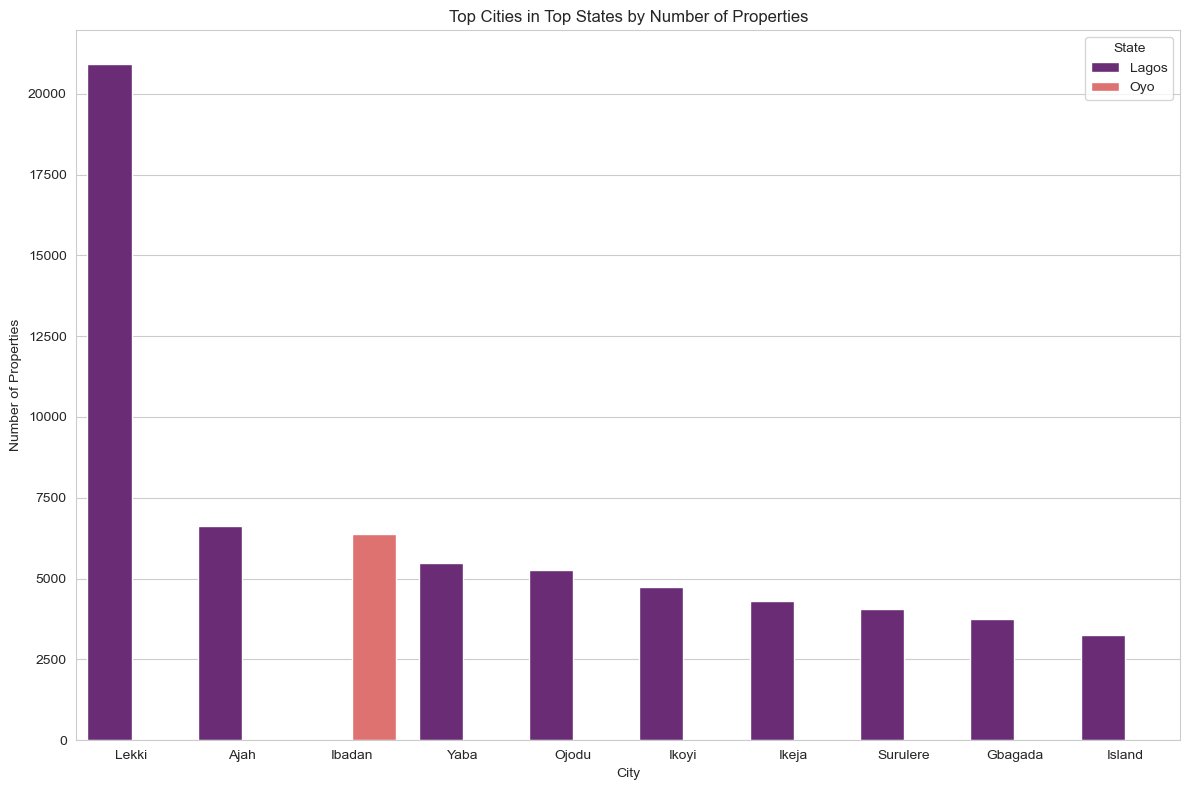

In [181]:
#geographical distribution states level
state_dist = dfc['Location'].value_counts(ascending=False)
top_5_states = state_dist.head(5).index
#filtering the data for the top 5 states
top_states_data = dfc[dfc['Location'].isin(top_5_states)]
#analyzing the distribution of properties in each city of each state
top_state_dist = top_states_data.groupby(['Location', 'City']).size().sort_values(ascending=False).reset_index(name = 'Number of Properties')
#visualizing the top 10 cities across each state
top_cities = top_state_dist.head(10)

plt.figure(figsize = (12,8))
sns.barplot(x = 'City', y = 'Number of Properties', data = top_cities, palette='magma', hue= 'Location')
plt.title('Top Cities in Top States by Number of Properties')
plt.ylabel('Number of Properties')
plt.xlabel('City')
plt.legend(title='State')
plt.tight_layout()
plt.show()